In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

* Importando as bibliotecas necessárias para a resolução do desafio. 

In [2]:
from IPython.core.pylabtools import figsize

figsize(12, 9)

sns.set()

* Padronizando o tamanho de eventuais gráficos que eu venha traçar. 

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

* Lendo os datasets de treino e teste.

In [4]:
if set(df_test.columns).issubset(set(df_train.columns)):print('Os dados são válidos')

Os dados são válidos


* Validando se o dataset de teste faz parte do dataset de treino.

## Escolhendo as features para o modelo.

In [5]:
df_train.corr()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,NU_IDADE,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,...,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041
Unnamed: 0,1.000000,NaN,-0.007258,-0.007250,-0.007201,0.003678,0.005707,-0.006217,-0.004527,-0.004615,...,0.001520,0.018074,0.001693,-0.008141,0.002724,-0.004914,0.003906,0.001002,-0.010967,-0.029937
NU_ANO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CO_MUNICIPIO_RESIDENCIA,-0.007258,NaN,1.000000,0.999865,-0.002296,0.020813,-0.236178,0.009710,0.865294,0.865216,...,0.004115,-0.030114,-0.050304,-0.050138,-0.040668,-0.013479,-0.032710,-0.094862,-0.077456,-0.033205
CO_UF_RESIDENCIA,-0.007250,NaN,0.999865,1.000000,-0.002017,0.020947,-0.234786,0.009433,0.864791,0.864919,...,0.003968,-0.030345,-0.050096,-0.049292,-0.040688,-0.013647,-0.032467,-0.094113,-0.076838,-0.033149
NU_IDADE,-0.007201,NaN,-0.002296,-0.002017,1.000000,0.533462,0.009675,-0.017713,-0.030711,-0.030259,...,-0.044791,0.025077,-0.030681,0.012739,0.021949,-0.003569,-0.035306,-0.069973,-0.010988,0.160526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q037,-0.004914,NaN,-0.013479,-0.013647,-0.003569,0.002294,0.086642,0.032588,-0.024174,-0.024201,...,0.220839,0.225791,0.245757,0.202230,0.387722,1.000000,0.496678,0.254418,0.270380,0.187921
Q038,0.003906,NaN,-0.032710,-0.032467,-0.035306,-0.014725,0.069298,0.024112,-0.038666,-0.038305,...,0.159887,0.223508,0.215767,0.142610,0.378421,0.496678,1.000000,0.374424,0.259947,0.219529
Q039,0.001002,NaN,-0.094862,-0.094113,-0.069973,-0.066346,0.046830,0.011327,-0.097273,-0.096666,...,0.144264,0.206979,0.189252,0.225724,0.270343,0.254418,0.374424,1.000000,0.305357,0.262031
Q040,-0.010967,NaN,-0.077456,-0.076838,-0.010988,-0.022736,0.053556,0.014847,-0.081490,-0.080963,...,0.215292,0.176028,0.243190,0.179292,0.177025,0.270380,0.259947,0.305357,1.000000,0.306438


* Fazendo um estudo de correlação das features 

In [6]:
corr_mt = df_train[df_train.columns[1:]].corr()['IN_TREINEIRO'][:]
corr_mt.sort_values(ascending=False).head(6)

IN_TREINEIRO       1.000000
TP_ST_CONCLUSAO    0.533983
TP_PRESENCA_CN     0.094692
TP_PRESENCA_CH     0.094692
TP_PRESENCA_LC     0.092454
TP_PRESENCA_MT     0.092454
Name: IN_TREINEIRO, dtype: float64

* Vizalidando as top 5 correlações positivas para a nossa feature target.

In [7]:
corr_mt.sort_values().head()

NU_IDADE          -0.295091
TP_ANO_CONCLUIU   -0.257710
TP_ESCOLA         -0.244562
IN_CERTIFICADO    -0.142185
TP_ESTADO_CIVIL   -0.117932
Name: IN_TREINEIRO, dtype: float64

* Outro passo importante é verificar se há correlações negativas significantes

In [8]:
corr_spearman = df_train[df_train.columns[1:]].corr(method='spearman')['IN_TREINEIRO'][:]
corr_spearman.sort_values(ascending=False).head()

IN_TREINEIRO       1.000000
TP_ST_CONCLUSAO    0.536272
TP_PRESENCA_CH     0.094805
TP_PRESENCA_CN     0.094805
TP_PRESENCA_LC     0.092589
Name: IN_TREINEIRO, dtype: float64

In [9]:
corr_spearman.sort_values().head()

NU_IDADE          -0.535499
TP_ANO_CONCLUIU   -0.344331
TP_ESCOLA         -0.258023
IN_CERTIFICADO    -0.142185
TP_ESTADO_CIVIL   -0.124211
Name: IN_TREINEIRO, dtype: float64

* Conclusão: É sempre importante verificar tanto as correlações positivas quanto negativas, visto que dentre as features com correlação positiva, só a 'TP_ST_CONCLUSAO' teve uma correlação forte enquanto o relativo as correlações negativas as features: 'NU_IDADE', 'TP_ANO_CONCLUIU'e 'TP_ESCOLA' tiveram uma grande representatividade, sendo estas, as features escolhidas no meu modelo.

* PS: A correlação de pearson foi usada para um tira teima depois de uma pesquisa sobre o melhor método de correlação para features categóricas e ele se mostrou mais eficaz, pois deu maior peso à algumas features o que poderia impactar muito na efciência do modelo dependendo do dataset avaliado. 

In [10]:
features = ['TP_ST_CONCLUSAO', 'NU_IDADE', 'TP_ANO_CONCLUIU', 'TP_ESCOLA']
features_corr = ['IN_TREINEIRO','TP_ST_CONCLUSAO', 'NU_IDADE', 'TP_ANO_CONCLUIU', 'TP_ESCOLA']

* Separando as features escolhidas

In [11]:
df_train[features_corr].isna().sum()

IN_TREINEIRO       0
TP_ST_CONCLUSAO    0
NU_IDADE           0
TP_ANO_CONCLUIU    0
TP_ESCOLA          0
dtype: int64

* Verificando se há a presença de dados faltantes nas features escolhidas para o dataset de treino. 

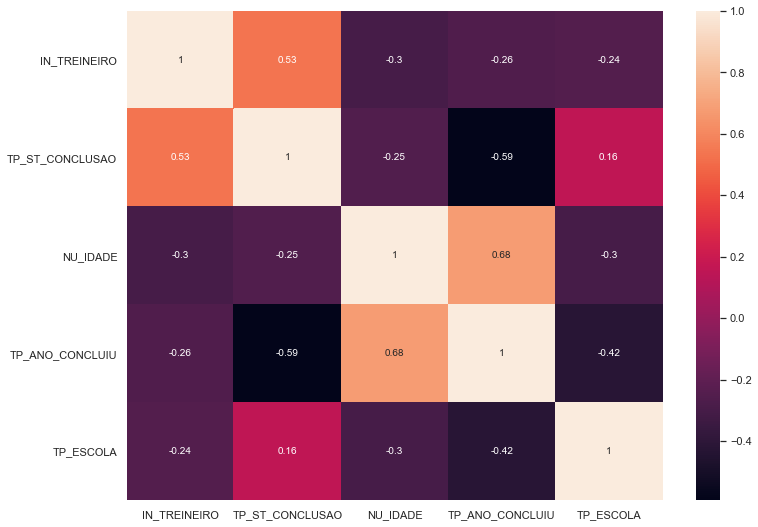

In [12]:
correlation = df_train[features_corr].corr()
sns.heatmap(correlation, annot=True, annot_kws={'size':10});

* Visualização das features escolhidas a partir de um heatmap de correlação com a feature target('IN_TREINEIRO')

## Criando e testando modelos de machine learning

In [13]:
target_train = df_train['IN_TREINEIRO']
x_train = df_train[features]
X_test = df_test[features]

* Criando as variáveis que serão utilizadas no modelo de classificação.

In [14]:
dicionario_metodos={'Naive Bayes': GaussianNB(), 'Árvode de Decisão': DecisionTreeClassifier(criterion='entropy'),
                    'Random Forest': RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=777), 
                    'Bagging': BaggingClassifier(DecisionTreeClassifier(), n_estimators=300, max_samples=100, bootstrap=True), 
                    'Regressão Logística': LogisticRegression()}

* Criando um dicionário com os métodos de classifcação que serão testado

In [50]:
dicionario_metricas={'Acuracia': accuracy_score, 'Precisão': precision_score, 'Recall': recall_score} 


* Criando um dicionário com as métricas que avaliarão os métodos acima.

In [53]:
for nome, metodo in dicionario_metodos.items():
    classificador = metodo
    classificador.fit(x_train, target_train)
    predicted = classificador.predict(x_train)
    lista_resultados = []
    print('', nome, sep='\n')
    for score, metrica in dicionario_metricas.items():
        
        resultado = metrica(target_train, predicted)
        print(score, round(resultado,4))
        


Naive Bayes
Acuracia 0.9713
Precisão 0.819
Recall 1.0

Árvode de Decisão
Acuracia 0.997
Precisão 1.0
Recall 0.977

Random Forest
Acuracia 0.997
Precisão 1.0
Recall 0.977

Bagging
Acuracia 0.9956
Precisão 0.9892
Recall 0.977

Regressão Logística
Acuracia 0.9955
Precisão 0.9881
Recall 0.977


* Criando um código para avaliar o melhor modelo de ML

# Naive Bayes

In [ ]:
classificador = GaussianNB()

In [ ]:
classificador.fit(x_train, target_train)

In [ ]:
predicted = classificador.predict(x_train)
predicted[:5]

In [ ]:
predicted_test = classificador.predict(X_test)
predicted_test[:5]

In [ ]:
precisao = accuracy_score(target_train, predicted)

In [ ]:
round(precisao*100,4)

In [ ]:
matriz = confusion_matrix(target_train, predicted)

In [ ]:
matriz

### Métricas: ###
* Precisão: 97.1304 
* Codenation: 97.3522 

# Árvore de Decisão

In [ ]:
ad_classificador = DecisionTreeClassifier(criterion='entropy')

In [ ]:
ad_classificador.fit(x_train, target_train)

In [ ]:
ad_predicted = ad_classificador.predict(x_train)
ad_predicted[:5]

In [ ]:
ad_predicted_test = ad_classificador.predict(X_test)
ad_predicted_test[:5]

In [ ]:
ad_precisao = accuracy_score(target_train, ad_predicted)

In [ ]:
round(ad_precisao*100,4)

In [ ]:
ad_matriz = confusion_matrix(target_train, ad_predicted)
ad_matriz

### Métricas: ###
* Precisão: 99.7014 
* Codenation: 99.7374 

# Random Forest #

In [ ]:
rf_classificador = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=777)

In [ ]:
rf_classificador.fit(x_train, target_train)

In [ ]:
rf_predicted = rf_classificador.predict(x_train)
rf_predicted[:5]

In [ ]:
rf_predicted_test = rf_classificador.predict(X_test)
rf_predicted_test[:5]

In [ ]:
rf_precisao = precision_score(target_train, rf_predicted)
round(rf_precisao*100,4)

In [ ]:
rf_matriz = confusion_matrix(target_train, rf_predicted)
rf_matriz

# Bagging

In [ ]:
bg_classificador = BaggingClassifier(DecisionTreeClassifier(), n_estimators=300, max_samples=100, bootstrap=True)

In [ ]:
bg_classificador.fit(x_train, target_train)

In [ ]:
bg_predicted = bg_classificador.predict(x_train)
bg_predicted[:5]

In [ ]:
bg_predicted_test = bg_classificador.predict(X_test)
bg_predicted_test[:5]

In [ ]:
bg_precisao = accuracy_score(target_train, bg_predicted)
round(bg_precisao*100,5)

In [ ]:
bg_matriz = confusion_matrix(target_train, bg_predicted)
bg_matriz

### Métricas: ###
* Precisão: 99.563 
* Codenation: 99.6498 

# Regressão Logística #

In [ ]:
lr_classificador = LogisticRegression()

In [ ]:
lr_classificador.fit(x_train, target_train)

In [ ]:
lr_predicted = lr_classificador.predict(x_train)
lr_predicted[:5]

In [ ]:
lr_predicted_test = lr_classificador.predict(X_test)
lr_predicted_test[:5]

In [ ]:
lr_precisao = accuracy_score(target_train, lr_predicted)
round(bg_precisao*100,5)

In [ ]:
lr_matriz = confusion_matrix(target_train, lr_predicted)
lr_matriz

### Métricas: ###
* Acurácia: 99.563 
* Codenation: 99.6280 

In [ ]:
NU_INSCRICAO = df_test['NU_INSCRICAO'].values
final = pd.DataFrame(list(zip(NU_INSCRICAO, lr_predicted_test)), columns = ['NU_INSCRICAO', 'IN_TREINEIRO'])
final.to_csv('answer.csv', sep=',', index=False)

# Criando e testando um código para automatizar a a escolha do modelo de ML

In [54]:

melhor_predizor = {}
for nome, metodo in dicionario_metodos.items():
    classificador = metodo
    classificador.fit(x_train, target_train)
    predicted = classificador.predict(x_train)
    lista_resultados = []
    for score, metrica in dicionario_metricas.items():
        resultado = metrica(target_train, predicted)
        #print(score, round(resultado,4))
        lista_resultados.append(resultado)
        #lista_resultados = [round(x,5) for x in lista_resultados]
    if lista_resultados[0]> 0.97 and lista_resultados[1]> 0.97:
        #print(nome, '', sep='\n')
        #print(lista_resultados)
        melhor_predizor[nome] = lista_resultados
        #acuracia = lista_resultados[0]
        #precisao = lista_resultados[1]
        #recall = lista_resultados[2]
melhor_resultado = [0, 0]
for predizor, resultado in melhor_predizor.items():
    if  resultado[0] >= melhor_resultado[0]  and resultado[1] >= melhor_resultado[1]:
        novo_classificador = dicionario_metodos.get(predizor)
        melhor_resultado = resultado
        melhor_predizor = predizor

novo_classificador.fit(x_train, target_train)
predicted_test = novo_classificador.predict(X_test)
print(f'O classficicador usado foi {melhor_predizor}')
        
NU_INSCRICAO = df_test['NU_INSCRICAO'].values
final = pd.DataFrame(list(zip(NU_INSCRICAO, predicted_test)), columns = ['NU_INSCRICAO', 'IN_TREINEIRO'])
final.to_csv('answer.csv', sep=',', index=False)
         

O classficicador usado foi Random Forest


* Resuldado foi de 99,73 na condenation.